In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df['helpful%'] = np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
df['HelpfulnessNumerator'].unique()

array([  1,   0,   3,   4,   2,  19,  13,   9,  15,   5,  17,   8,   6,
         7,  43,  14,  11,  20,  27,  12,  10,  16,  21,  26,  23, 165,
        45,  30, 100,  32,  24,  22,  18,  59, 187,  29, 112, 107,  51,
        36,  25,  88,  35,  38,  42,  70,  86,  48,  34,  96,  53,  40,
        31,  65, 128,  97,  82,  37,  28, 202,  47, 149,  80,  77,  69,
        56,  39, 111,  60,  66,  44,  91, 115,  93, 180, 129,  58,  83,
        55,  62,  89,  50,  33, 135,  71, 157,  73, 122,  90,  81, 203,
       168,  64,  61, 398, 206, 133,  41,  84,  63,  95,  68, 110,  57,
        72,  52,  54,  49, 177,  46, 137, 286,  87, 264,  85, 258,  75,
       119, 123, 131, 125, 200, 536, 301,  78, 559, 472, 232, 294,  79,
        67, 154, 105,  74, 117, 113, 141, 162, 349, 130, 230, 189, 454,
       172, 116, 179, 138, 166, 142, 170, 247, 366, 106, 219,  94,  76,
        92, 413, 139, 866, 524, 233, 104, 844,  99, 144, 124, 491, 355,
       121, 192, 580, 102, 155, 436, 446, 262, 319, 103, 356, 43

In [7]:
df['upvote%']=pd.cut(df['helpful%'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels = ['empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

In [8]:
df.groupby(['Score','upvote%']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score upvote%                                                                 
1     empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  helpful%  
Score upvote%                                                             
1     empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [9]:
df_s=df.groupby(['Score','upvote%']).agg({'Id':'count'}).reset_index()

In [10]:
pivot = df_s.pivot(index='upvote%',columns='Score')

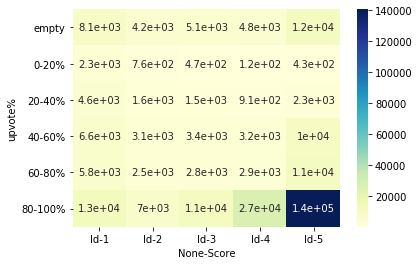

In [11]:
sns.heatmap(pivot,annot=True,cmap='YlGnBu')

In [12]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [13]:
df2 = df[df['Score']!=3]

In [14]:
df2['Score'].unique()

array([5, 1, 4, 2])

In [15]:
X = df2['Text']

In [16]:
y=df2['Score'].map({1:0,2:0,4:1,5:1})

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X_c = cv.fit_transform(X)

In [18]:
X_c.shape

(525814, 114969)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_c,y)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
ml = lr.fit(X_train,y_train)

/home/anshi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
ml.score(X_test,y_test)

0.9371871529204132

In [22]:
words = cv.get_feature_names()
words

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [23]:
coef = ml.coef_.tolist()[0]
coef

[-0.288288288981505,
 0.05857631034697341,
 0.4690658488853806,
 -0.009519882484433365,
 -0.012298795907085366,
 -0.011361319822712195,
 0.0003737386621768619,
 -0.012211357798419325,
 0.000466817297164275,
 0.0003721164595869973,
 0.002551537853735096,
 -0.01301838541360585,
 0.0014532349366402628,
 0.012966000749388083,
 -0.1745750841738798,
 0.005440485870449806,
 0.0021587424305592497,
 0.0,
 0.000620646450387276,
 0.0,
 -0.045383903342618714,
 0.02101366816723361,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.03900263813529541,
 0.0,
 0.06338456022519813,
 0.00012072887904091052,
 -0.09726935884220292,
 -0.0005237751802964266,
 0.00011580136942689786,
 0.0,
 0.1336182718203283,
 2.2812380758501007e-05,
 -0.11722865658047057,
 0.011568598497288876,
 7.216939271154803e-05,
 0.004035668632647059,
 -0.08329333889607474,
 0.0001232882255733949,
 0.0125030

In [24]:
coef_df = pd.DataFrame({'Word':words,"Coefficient":coef})

In [27]:
coef_df = coef_df.sort_values(['Coefficient','Word'],ascending=False)

In [28]:
coef_df.head(20)

,Word,Coefficient
80600,pleasantly,4.156020
39072,downside,3.390934
5865,addicting,3.120902
94667,skeptical,2.863765
39214,drawback,2.680888
55029,hooked,2.396943
54130,hesitant,2.389672
24746,calm,2.377844
87967,resist,2.363938
35726,delish,2.206650


In [29]:
coef_df.tail(20)

,Word,Coefficient
21288,blech,-2.337755
102845,terrible,-2.338502
76576,overpowers,-2.357038
58720,invest,-2.428060
65064,lousy,-2.431042
106894,unappealing,-2.498237
23814,bummer,-2.528603
37563,disappointment,-2.614728
35220,defeats,-2.654765
41118,embarrassed,-2.760570


In [33]:
def text_fit(X,y,nlp_model,ml_model,show_coef=1):
    X_c = nlp_model.fit_transform(X)
    print('features :{}'.format(X_c.shape[1]))
    X_train,X_test,y_train,y_test = train_test_split(X_c,y)
    ml = ml_model.fit(X_train,y_train)
    acc = ml.score(X_test,y_test)
    print(acc)
    if show_coef==1:
        words = cv.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coef_df = pd.DataFrame({'Word':words,"Coefficient":coef})
        coef_df = coef_df.sort_values(['Coefficient','Word'],ascending=False)
        print('\n')
        print('Top 20 positive words')
        print(coef_df.head(20))
        print('\n')
        print('Top 20 negative words')
        print(coef_df.tail(20))

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
text_fit(X,y,cv,LogisticRegression())

features :114969


/home/anshi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9366622544768513


Top 20 positive words
              Word  Coefficient
80600   pleasantly     4.095148
39072     downside     3.022771
94667    skeptical     2.603824
5865     addicting     2.585205
55029       hooked     2.345980
39214     drawback     2.268130
35726       delish     2.116231
102857    terrific     2.087515
51189     grateful     2.085703
87967       resist     2.064789
96140       solved     2.050364
113138     worries     2.035052
43222    excellent     2.017436
78641        penny     1.976837
78889      perfect     1.950840
105162     trainer     1.937205
91064        saves     1.907077
103080    thankful     1.902623
114360         yum     1.844455
54738        holds     1.789352


Top 20 negative words
                  Word  Coefficient
37563   disappointment    -2.121703
102845        terrible    -2.126007
110404         vomited    -2.159273
56229              ick    -2.189298
50059          glowing    -2.205603
89868            ruins    -2.212827
76576    

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X,y,nlp_model,ml_model):
    X_c = nlp_model.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X_c,y)
    ml = ml_model.fit(X_train,y_train)
    predictions=ml.predict(X_test)
    cm = confusion_matrix(predictions,y_test)
    print(cm)
    acc= accuracy_score(predictions,y_test)
    print(acc)

In [38]:
predict(X,y,cv,LogisticRegression())

[[ 14939   2775]
 [  5532 108208]]
0.9368067917294263


/home/anshi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [40]:
text_fit(X,y,tfidf,LogisticRegression())

features :114969


/home/anshi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9357874237375812


Top 20 positive words
              Word  Coefficient
51300        great    13.965015
35641    delicious    12.328612
20308         best    11.687031
78889      perfect    10.872830
43222    excellent    10.106527
65108        loves     9.464208
54309       highly     8.910282
65072         love     8.446805
112883   wonderful     8.378383
7821       amazing     7.836486
10992      awesome     7.779621
50510         good     7.463752
55029       hooked     7.345410
114428       yummy     7.013624
44752     favorite     6.900606
95450       smooth     6.881971
80608      pleased     6.878100
49855         glad     6.858811
80600   pleasantly     6.838792
72818         nice     6.715056


Top 20 negative words
                  Word  Coefficient
111047           waste    -5.794636
97956            stale    -6.030389
107383     undrinkable    -6.038084
90197            sadly    -6.086022
114320            yuck    -6.156616
37842       disgusting    -6.407494
111251   